<a href="https://colab.research.google.com/github/shashwat-2077/GeekWeek-Local/blob/main/03_LinearRegression/3a_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML.now()` course


`Univariate Linear Regression`

[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Date Created**: June 6, 2021


**Author**:
 Shashwat PaPattanayak 

**Reach out**:
[Email](https://www.google.com/intl/en-GB/gmail/about/#) | [GitHub](https://github.com/shashwat-2077) | [LinkedIn](https://www.linkedin.com/in/)

[[Course Repository](https://github.com/shashwat-2077/MLnow_GirlScript)]

Feel free to check out my [website](http://shashwat-2077.github.io/) for more information

#Setup

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
cd '/content/drive/MyDrive/LiveCodeSession/02_EDA/student'

/content/drive/MyDrive/LiveCodeSession/02_EDA/student


In [22]:
ls

cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv  univariate_MathData_2.csv


In [23]:
import os

Importing the necessary libraries for data processing

In [24]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

To load the data, we have a 

In [25]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [26]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


We are just going to consider the columns `G1` and `G3` for univariate linear regression

$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [27]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [28]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [29]:
ls

cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv  univariate_MathData_2.csv


## Data visualization

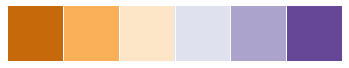

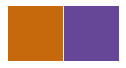

In [30]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [31]:
uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

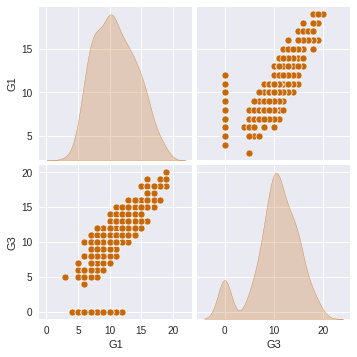

In [32]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

## Data Splits

In [33]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [34]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [35]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [36]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [37]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [38]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [39]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [40]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 1s 32ms/step - loss: 19.5364 - mae: 19.5364 - mse: 430.6103 - val_loss: 20.6238 - val_mae: 20.6238 - val_mse: 477.7191
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 19.4186 - mae: 19.4186 - mse: 425.5860 - val_loss: 20.4994 - val_mae: 20.4994 - val_mse: 472.1400
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 19.3014 - mae: 19.3014 - mse: 420.6334 - val_loss: 20.3747 - val_mae: 20.3747 - val_mse: 466.5780
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 19.1837 - mae: 19.1837 - mse: 415.7109 - val_loss: 20.2504 - val_mae: 20.2504 - val_mse: 461.0634
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 19.0657 - mae: 19.0657 - mse: 410.7161 - val_loss: 20.1261 - val_mae: 20.1261 - val_mse: 455.5863
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 18.9490 - mae: 18.9490 - mse: 405.9349 - val_loss: 20.0011 - val_mae: 2

In [41]:
print(history)

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


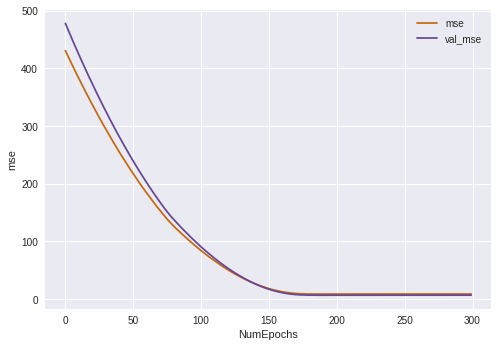

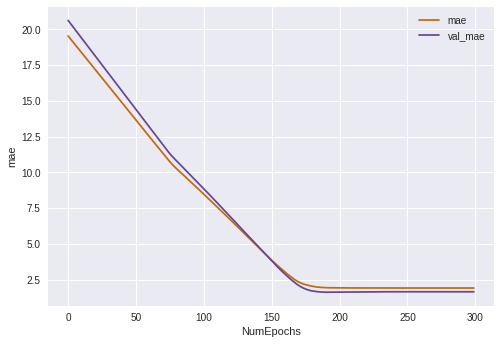

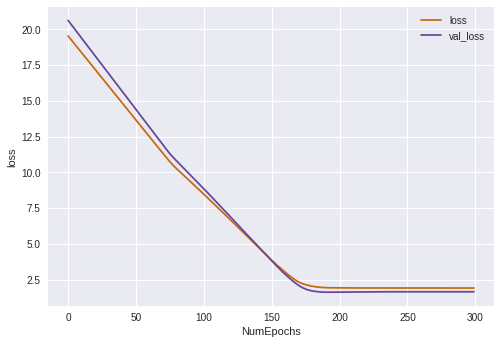

In [43]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [44]:
model.predict([1])

array([[2.4528532]], dtype=float32)

In [45]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[2.4528532]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[2.4528532]
 [3.321169 ]
 [4.189484 ]
 [5.0578   ]
 [5.9261155]]

List of Predictions (flattened out):
[2.4528532 3.321169  4.189484  5.0578    5.9261155]



In [46]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [47]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [48]:
print(len(testPreds))
print(testPreds)

79
[13.740953   6.7944307 11.136007  16.345901  16.345901  12.004323
 13.740953  18.082531  18.082531   8.531061  13.740953  12.872639
  8.531061   7.662746   9.399377  12.872639  11.136007  15.477585
  7.662746  10.267693  14.609269  12.872639  13.740953  15.477585
  7.662746   7.662746   8.531061  10.267693  12.004323  10.267693
 12.004323  12.872639  10.267693   6.7944307  9.399377  12.004323
  7.662746   8.531061  13.740953   9.399377   9.399377   7.662746
 12.004323   6.7944307 12.872639   7.662746   7.662746  11.136007
 12.872639  16.345901  12.004323  14.609269   9.399377  12.004323
 14.609269  12.004323  14.609269  12.004323  14.609269  11.136007
 12.004323   8.531061  15.477585   7.662746  15.477585  11.136007
 15.477585  12.872639   8.531061   8.531061  12.004323  17.214216
 12.872639  15.477585  10.267693   7.662746  10.267693   7.662746
 11.136007 ]


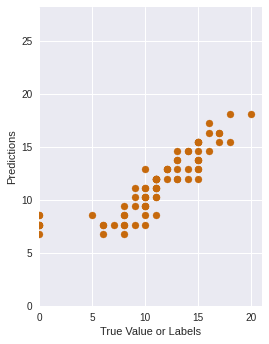

In [49]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

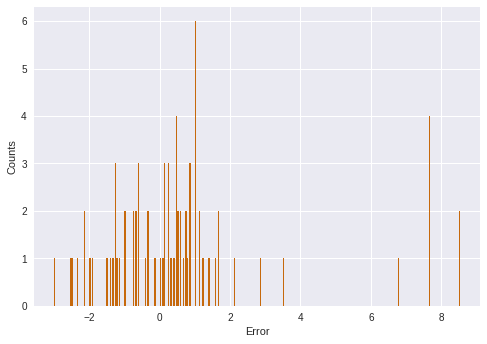

In [50]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

Note: 


Validation loss `val_loss` is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

- Hyperparameter tuning --> `numEpochs`, `optimizer`, `learning_rate`, lossFunctions